# Creative Extension Analysis

---

**** Explain how we get the dataset

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hiding the warnings
import warnings; warnings.simplefilter('ignore') # can we add this one to not see the warnings every time?

# Set random seed for consistency 
import random
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
seed = 42
random.seed(seed)
np.random.seed(seed)

# Vader 
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Bert sa-pipeline
from transformers import pipeline

from scipy import stats


## Data preprocessing 

---

In [2]:
# Loading the dataset

tweets = pd.read_csv('./Data/tweets',low_memory=False)
tweets.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Sun Feb 14 23:29:33 +0000 2010,NaN,NaN,NaN,0,9116606357,NaN,NaN,NaN,...,29,17,0,"Sofia, Bulgaria",Ina Gerdjikova,InaGerdjikova,6,NaN,http://kutiazamisli.blogspot.com/,False
1,NaN,Fri Sep 24 20:40:25 +0000 2010,NaN,NaN,NaN,0,25437022568,NaN,NaN,NaN,...,12,9,0,NaN,Ana Paula Ribeiro,anadadal,7,NaN,NaN,False
2,NaN,Tue Jun 14 07:54:35 +0000 2011,NaN,NaN,http://kutiazamisli.blogspot.com/2011/06/blog-...,0,80543642816757761,NaN,NaN,NaN,...,29,17,0,"Sofia, Bulgaria",Ina Gerdjikova,InaGerdjikova,6,NaN,http://kutiazamisli.blogspot.com/,False
3,NaN,Tue Aug 12 17:51:37 +0000 2014,NaN,NaN,http://twitcam.livestream.com/g7hpe,0,499251874256920577,NaN,NaN,NaN,...,12,9,0,NaN,Ana Paula Ribeiro,anadadal,7,NaN,NaN,False
4,NaN,Fri Oct 25 11:38:21 +0000 2013,SmurfsVillage,NaN,http://bit.ly/Smurf47,0,393703073228808192,NaN,NaN,NaN,...,6,17,0,Land of the happily single,sheena c wallace,sheasofly,268,NaN,NaN,False


In [3]:
# Exploring the dataset

print(f"In total there are {len(tweets)} tweets.")

In total there are 1609389 tweets.


In [4]:
tweets.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

> For this analysis we are only concerned with english tweets, so we need to filter the data using the language information

In [5]:
# Selecting only english tweets

en_tweets = tweets.loc[tweets['lang']=='en']
print(f"In total there are {len(en_tweets)} english tweets.")

In total there are 1093122 english tweets.


> We also want to drop duplicate tweets. The reason for this is because if a tweet is repeated many times, then it is most likely due to a bot account. With this analysis we are concern with the sentiment of real users, so data from bot accounts could disrupt the results

In [6]:
# Demonstrating examples of duplicate tweets
en_tweets.value_counts(subset = 'text', sort = True)[0:5]


text
IF U HAVE A FACEBOOK ACCOUNT,PLZ TELL ME UR ACCOUNTNAME&lt;333 U U TELL ME IT WHEN I TELL U MINE:)    2738
Here is a neat little package to create banners  http://perfecttrafficstorm.com/links/19768            171
Check this Out  http://perfecttrafficstorm.com/links/19778                                             170
Grab this package of articles    http://perfecttrafficstorm.com/links/19769                            169
Check out the PLR CHEATER http://perfecttrafficstorm.com/links/19773                                   169
dtype: int64

In [7]:
# Dropping all duplicates tweets
en_tweets.drop_duplicates(subset=['text'], keep = False, inplace = True)
print(f"After dropping the duplicates, there are {len(en_tweets)} english tweets.")


After dropping the duplicates, there are 1054619 english tweets.


In [8]:
# Checking how many users we have 
usernames = en_tweets.value_counts(subset = 'user_name', sort = True)
print(f"There are a total of {len(usernames)} users which posted {len(en_tweets)} english tweets.")
usernames.head(5)


There are a total of 6167 users which posted 1054619 english tweets.


user_name
michelle              3906
Austin Health Jobs    3197
Mark Whittington      3189
Games For Pro         3188
BELIVE ADULT          3162
dtype: int64

In [9]:
# Giving a look to some tweet texts
# it is not printing all of it

print(en_tweets.text.iloc[0])
print(en_tweets.text.iloc[1])

en_tweets.text.head(5)

Will try to live for a week offline... wish me luck! :D
Boa tarde..
 (@shekinahbiscuit live on http://t.co/nU1N0NJJIJ)


0     Will try to live for a week offline... wish me...
3     Boa tarde..\n (@shekinahbiscuit live on http:/...
8     Phew... Valentine's day will be finally over i...
9     up\n (@deiabiscuit32 live on http://t.co/J8uYV...
11    simmm\n (@deiabiscuit32 live on http://t.co/J8...
Name: text, dtype: object

In [10]:
# The tweets texts are in string format
type(en_tweets.text.iloc[0])

str

> Before going on with the sentiment analysis task, there is the need to preprocess the data set. Indeed, from the previous tweets texts we can see that there are many links, citations, stops words which does not add any value to the sentiment classifier. Need to get rid of them 

### Removing special characters from the tweew such as URLs (“http://url”), user mention (@), and the symbol of hashtags (#) to improve the classification

In [11]:
# Importing RE (regular expression) module to replace the http with empty string. 
import re

### need to be better explained .

# 'r' added to not handle backslashes in any special way in the following string
# https? will match either ‘http’ or ‘https’
# https?:\/\/ will match any "http://" and "https://" in the following string
# \S Returns a match where the string does not contain a white space character inside. 
    # Indeed, we want to keep the test that follows the URL.
    
# * Zero or more occurrences --> I think we can delete the *, i dont see any case where it could be useful



clean_tweets = [] 

for i in range(len(en_tweets)):
    
    # Selecting one tweet
    text_i = en_tweets.text.iloc[i]
    
    # Making the tweet in lower case
    text_i = text_i.lower() 
    
    # Deleting the URL only
    text_i = re.sub(r'https?:\/\/\S*', '', text_i, flags = re.MULTILINE)
    
    # Deleting the user mention @username
    text_i = re.sub(r'@\S*', '', text_i, flags = re.MULTILINE)
    
    # Deleting the hashtag symbol #
    text_i = text_i.replace("#", "")
    
    # append the cleaned tweet to the list previously initialized
    clean_tweets.append(text_i) 

In [12]:
# compare before and after preprocessing with a tweet that contains all of them.
print(en_tweets.text.iloc[8])
clean_tweets[8]

Have you been to the mountain? Reach new heights on the #SmurfVillage mountain! http://t.co/d9BVrqiU82 @BeelineGames


'have you been to the mountain? reach new heights on the smurfvillage mountain!  '

In [13]:
# Add the new column to the original df

en_tweets['clean_tweets'] =clean_tweets
en_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,clean_tweets
0,NaN,Sun Feb 14 23:29:33 +0000 2010,NaN,NaN,NaN,0,9116606357,NaN,NaN,NaN,...,17,0,"Sofia, Bulgaria",Ina Gerdjikova,InaGerdjikova,6,NaN,http://kutiazamisli.blogspot.com/,False,will try to live for a week offline... wish me...
3,NaN,Tue Aug 12 17:51:37 +0000 2014,NaN,NaN,http://twitcam.livestream.com/g7hpe,0,499251874256920577,NaN,NaN,NaN,...,9,0,NaN,Ana Paula Ribeiro,anadadal,7,NaN,NaN,False,boa tarde..\n ( live on
8,NaN,Sun Feb 14 18:46:26 +0000 2010,NaN,NaN,NaN,0,9107804301,NaN,NaN,NaN,...,17,0,"Sofia, Bulgaria",Ina Gerdjikova,InaGerdjikova,6,NaN,http://kutiazamisli.blogspot.com/,False,phew... valentine's day will be finally over i...
9,NaN,Fri Sep 28 19:07:04 +0000 2012,NaN,NaN,http://twitcam.livestream.com/c7fe0,0,251759950655791105,NaN,NaN,NaN,...,9,0,NaN,Ana Paula Ribeiro,anadadal,7,NaN,NaN,False,up\n ( live on
11,NaN,Fri Sep 28 19:05:53 +0000 2012,NaN,NaN,http://twitcam.livestream.com/c7fe0,0,251759653464199168,NaN,NaN,NaN,...,9,0,NaN,Ana Paula Ribeiro,anadadal,7,NaN,NaN,False,simmm\n ( live on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609378,NaN,Thu Nov 07 19:47:01 +0000 2013,NaN,NaN,NaN,0,398537090977124353,NaN,NaN,NaN,...,20,0,NaN,Christopher Chang,Mathew_C_Chang,7,NaN,NaN,False,carry me to fantasy victory
1609385,NaN,Tue Jun 24 12:52:16 +0000 2014,NaN,NaN,NaN,0,481419535463890945,NaN,NaN,NaN,...,1528,0,♡,Logan Junior,LoganJuniorrb,11,NaN,NaN,False,"rt hi lovely 💕 you are my world, my life, my..."
1609386,NaN,Tue Jun 24 11:57:24 +0000 2014,NaN,NaN,NaN,0,481405727018209280,NaN,NaN,NaN,...,1528,0,♡,Logan Junior,LoganJuniorrb,11,NaN,NaN,False,"""many things about satanism are offensive."" - ..."
1609387,NaN,Thu May 22 02:02:29 +0000 2014,ArtemisStalkerSkin,NaN,http://bit.ly/11SPvxw,0,469297212129017856,NaN,NaN,NaN,...,2,0,NaN,Espy Brave,BraveEspy,1,NaN,NaN,False,smite artemisstalkerskin for free


## Rule-based sentiment analysis - VADER

---

The VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis consists of 4 columns: positive, neutral, negative, and compound polarity scores. For our case, we are only interested in the compound polarity score to determine the sentiment of the tweets

## Results with the cleaned tweets

In [14]:
#Initializing the Rule-based sentiment analyzer 
analyzer = SentimentIntensityAnalyzer()

In [15]:
en_tweets['sent_score'] = [analyzer.polarity_scores(x)['compound'] for x in en_tweets['clean_tweets']]

In [16]:
def sentiment(scores):
    sents = []
    for score in scores:
        if score >=0.05:
            sent = 'pos'
        elif score <=-0.05:
            sent = 'neg'
        elif abs(score) <0.05:
            sent = 'neu'
        sents.append(sent)
    return sents

In [17]:
en_tweets['sentiment'] = sentiment(en_tweets.sent_score)

In [18]:
grouped_sents = en_tweets.groupby(by='sentiment')

In [19]:
print('Number of positive sentences:',sum(np.array(en_tweets['sent_score'])>=0.05))
print('Number of negative sentences:',sum(np.array(en_tweets['sent_score'])<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(en_tweets['sent_score']))<0.05))

Number of positive sentences: 486431
Number of negative sentences: 210134
Number of neutral sentences: 358054


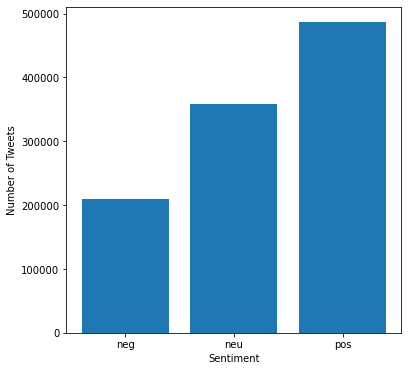

In [20]:
plt.figure(figsize=(6,6))
plt.bar(grouped_sents.size().index, grouped_sents.size().values, width=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [21]:
pos_sents = en_tweets.loc[en_tweets['sentiment'] == 'pos']
neg_sents = en_tweets.loc[en_tweets['sentiment'] == 'neg']

Niave analysis on affect of sentiment on retweet count 

In [22]:
print("The average number of retweets for positive tweets is {:.2f}".format(pos_sents.retweet_count.mean()))
print("The average number of retweets for negative tweets is {:.2f}".format(neg_sents.retweet_count.mean()))

The average number of retweets for positive tweets is 265.67
The average number of retweets for negative tweets is 177.23


In [23]:
stats.ttest_ind(pos_sents.retweet_count, neg_sents.retweet_count)

Ttest_indResult(statistic=8.811051752852348, pvalue=1.2425244762243974e-18)

In [24]:
stats.mannwhitneyu(pos_sents.retweet_count, neg_sents.retweet_count)

MannwhitneyuResult(statistic=50802465371.0, pvalue=5.7371004774119245e-08)

## Not sure if the statistical tests above make sense

In [25]:
pos_sents['retweet_count'].describe()

count    486431.000000
mean        265.669968
std        4168.821829
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      551788.000000
Name: retweet_count, dtype: float64

In [26]:
neg_sents['retweet_count'].describe()

count    210134.000000
mean        177.225604
std        2963.486267
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      426173.000000
Name: retweet_count, dtype: float64

In [27]:
pos_sents.sort_values(by=['retweet_count'], ascending = False)['retweet_count'].head(10)

453405     551788
971070     548016
1382810    473644
601483     337006
756569     322409
1097164    309553
1466955    298331
384720     297234
173075     284859
489620     274359
Name: retweet_count, dtype: int64

In [28]:
neg_sents.sort_values(by=['retweet_count'], ascending = False)['retweet_count'].head(10)

791467    426173
971292    290667
970966    237713
431728    226724
971090    201765
431141    196806
173016    181591
489521    178398
491761    169294
651023    167615
Name: retweet_count, dtype: int64

When looking at simple statistics, we see that positive sentiment tweets have a much larger standard deviation, so there is more likely a significantly larger number of tweets with large retweet counts. Also, looking at the top 10 highest retweeted tweets for positive tweets we find that positive tweets have higher max retween count. So, we need to try and filter the data to avoid effects of these very popular tweets

In [29]:
pos_sents_filtered = pos_sents.loc[pos_sents['retweet_count']<1000]
neg_sents_filtered = neg_sents.loc[neg_sents['retweet_count']<1000]

In [30]:
len(neg_sents_filtered)

205806

In [31]:
print("The average number of retweets for positive tweets is {:.2f}".format(pos_sents_filtered.retweet_count.mean()))
print("The average number of retweets for negative tweets is {:.2f}".format(neg_sents_filtered.retweet_count.mean()))

The average number of retweets for positive tweets is 12.92
The average number of retweets for negative tweets is 14.37


In [32]:
stats.ttest_ind(pos_sents_filtered.retweet_count, neg_sents_filtered.retweet_count)

Ttest_indResult(statistic=-6.928775971193933, pvalue=4.2487127277203635e-12)

In [33]:
stats.mannwhitneyu(pos_sents_filtered.retweet_count, neg_sents_filtered.retweet_count)

MannwhitneyuResult(statistic=48570066473.0, pvalue=9.757915513348562e-13)

However, we may find that the tweets with 0 retweets affect the data. Let's look at tweets with at least one retweet

In [34]:
pos_sents_filtered = pos_sents.loc[(pos_sents['retweet_count']<1000) & (pos_sents['retweet_count'])>0]
neg_sents_filtered = neg_sents.loc[(neg_sents['retweet_count']<1000) & (neg_sents['retweet_count']>0)]

In [35]:
print("The average number of retweets for positive tweets is {:.2f}".format(pos_sents_filtered.retweet_count.mean()))
print("The average number of retweets for negative tweets is {:.2f}".format(neg_sents_filtered.retweet_count.mean()))

The average number of retweets for positive tweets is 44.23
The average number of retweets for negative tweets is 63.11


In [36]:
stats.ttest_ind(pos_sents_filtered.retweet_count, neg_sents_filtered.retweet_count)

Ttest_indResult(statistic=-21.076573288100686, pvalue=1.9912399613748363e-98)

In [37]:
stats.mannwhitneyu(pos_sents_filtered.retweet_count, neg_sents_filtered.retweet_count)

MannwhitneyuResult(statistic=1342890623.0, pvalue=0.0)

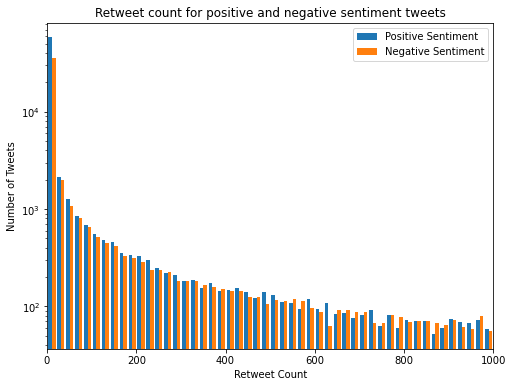

In [38]:
plt.figure(figsize=(8,6))

plt.hist([pos_sents_filtered.retweet_count, neg_sents_filtered.retweet_count], bins=50, label=['Positive Sentiment', 'Negative Sentiment'])
plt.legend(loc = 'upper right')
plt.title('Retweet count for positive and negative sentiment tweets')
plt.xlabel('Retweet Count')
plt.ylabel('Number of Tweets')
plt.yscale('log')
plt.xlim([0, 1000])
plt.show()

In [39]:
pos_same_size = pos_sents_filtered.sample(len(neg_sents_filtered))

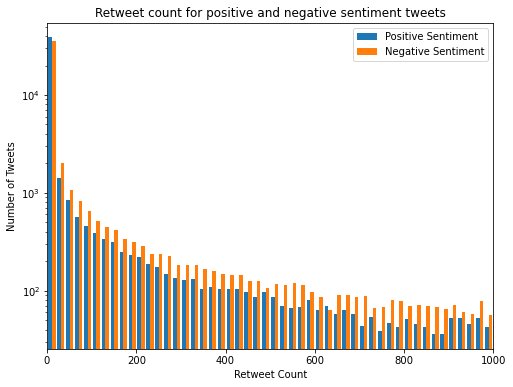

In [40]:
plt.figure(figsize=(8,6))

plt.hist([pos_same_size.retweet_count, neg_sents_filtered.retweet_count], bins=50, label=['Positive Sentiment', 'Negative Sentiment'])
plt.legend(loc = 'upper right')
plt.title('Retweet count for positive and negative sentiment tweets')
plt.xlabel('Retweet Count')
plt.ylabel('Number of Tweets')
plt.yscale('log')
plt.xlim([0, 1000])
plt.show()

## Results with the raw tweets

In [41]:
#Initializing the Rule-based sentiment analyzer 
analyzer = SentimentIntensityAnalyzer()

In [42]:
en_tweets['sent_score'] = [analyzer.polarity_scores(x)['compound'] for x in en_tweets['text']]

In [43]:
def sentiment(scores):
    sents = []
    for score in scores:
        if score >=0.05:
            sent = 'pos'
        elif score <=-0.05:
            sent = 'neg'
        elif abs(score) <0.05:
            sent = 'neu'
        sents.append(sent)
    return sents

In [44]:
en_tweets['sentiment'] = sentiment(en_tweets.sent_score)

In [45]:
grouped_sents = en_tweets.groupby(by='sentiment')

In [46]:
print('Number of positive sentences:',sum(np.array(en_tweets['sent_score'])>=0.05))
print('Number of negative sentences:',sum(np.array(en_tweets['sent_score'])<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(en_tweets['sent_score']))<0.05))

Number of positive sentences: 485976
Number of negative sentences: 210152
Number of neutral sentences: 358491


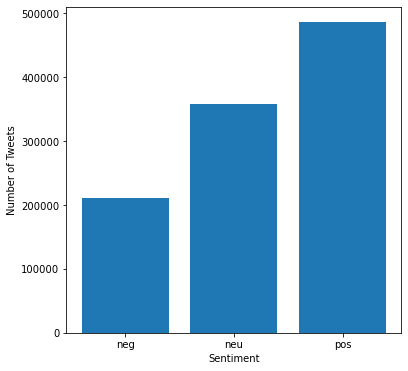

In [28]:
plt.figure(figsize=(6,6))
plt.bar(grouped_sents.size().index, grouped_sents.size().values, width=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# Bert SA-pipeline

In [2]:
sa_pipeline = pipeline('sentiment-analysis')

In [3]:
for i in range(10):
    text = en_tweets['text'].iloc[i]
    print(text)
    prediction = sa_pipeline(text)
    print(prediction)
    print()

NameError: name 'en_tweets' is not defined